In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from scipy import signal
#import time

In [2]:
#Load Data

data = pd.read_csv('/content/car_engine.csv', header = None)
data.shape

(1200048, 2)

In [3]:
#Determine Features

N = data.shape[0]  #length of the array = number of samples
time = data[0]
Fs = 1/(time[1]- time[0]) 	#sample rate (Hz)
T = 1/Fs
accel = data[1]

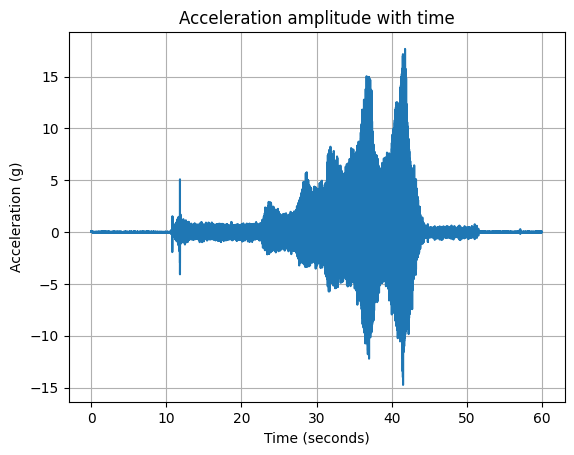

In [4]:
#Plot Data

plt.figure(1)
plt.plot(time, accel)
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration amplitude with time')
plt.grid()

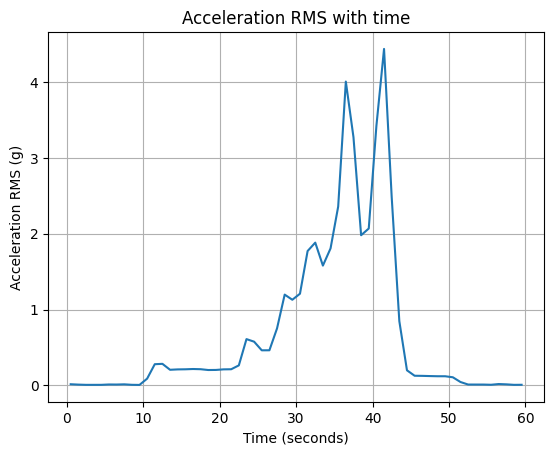

In [5]:
#Compute RMS & Plot

w = np.floor(Fs)                #width of the window for computing RMS
w = w.astype(int)
steps = np.int_(np.floor(N/w)); #number of steps for RMS
t_RMS = np.zeros((steps,1))     #create array for RMS time values
x_RMS = np.zeros((steps,1))     #create array for RMS values
for i in range (0, steps):
	t_RMS[i] = np.mean(time[(i*w):((i+1)*w)]);
	x_RMS[i] = np.sqrt(np.mean(accel[(i*w):((i+1)*w)]**2));
plt.figure(2)
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration RMS (g)')
plt.title('Acceleration RMS with time')
plt.grid()

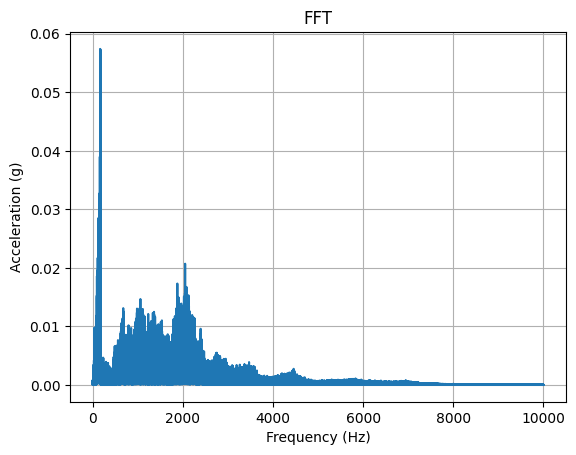

In [6]:
#Compute FFT and Plot

plt.figure(3)
xf = np.linspace(0, (1/(2*T)).astype(int), int(N/2))
yf = fft(np.array(accel))
plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Acceleration (g)')
plt.title('FFT')
plt.show()

In [8]:
Fs/4

5000.0

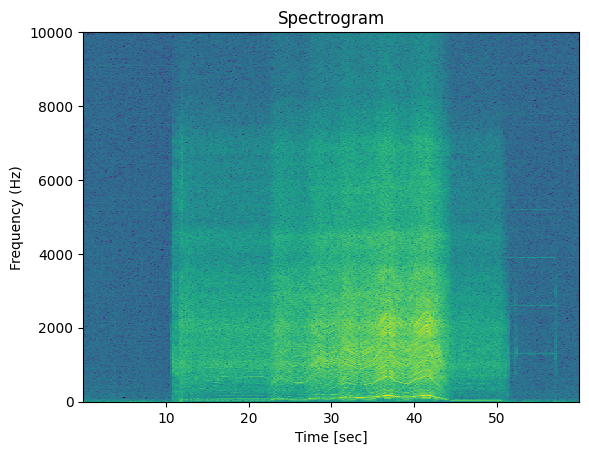

In [9]:
#Compute Spectrogram and Plot

plt.figure(4)
f, t2, Sxx = signal.spectrogram(accel, Fs, nperseg = int(Fs/4))
plt.pcolormesh(t2, f, np.log(Sxx))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.show()